In [50]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
import category_encoders as ce
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


In [51]:
def classification_metrics (y_test, y_pred):
    print("Accuracy is: ", accuracy_score(y_test, y_pred))
    print("Precision is: ", precision_score(y_test, y_pred))
    print("Recall is: ", recall_score(y_test, y_pred))
    print("F1-Score is: ", f1_score(y_test, y_pred))

In [52]:
def roc_curve_plot(y_test,y_pred,y_train, y_pred_train):
    plt.figure(figsize=(8,4))
    fpr, tpr, thresholds = roc_curve(y_test ,y_pred)
    fpr1, tpr1, thresholds1 = roc_curve(y_train ,y_pred_train)
    plt.plot(fpr, tpr)
    plt.plot(fpr1, tpr1)
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.title("ROC Curve")
    plt.show()

In [53]:
telco = pd.read_csv('Telco.csv')

In [54]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [55]:
telco.columns = telco.columns.str.lower()

In [56]:
telco.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [57]:
telco.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [58]:
telco.shape

(7043, 21)

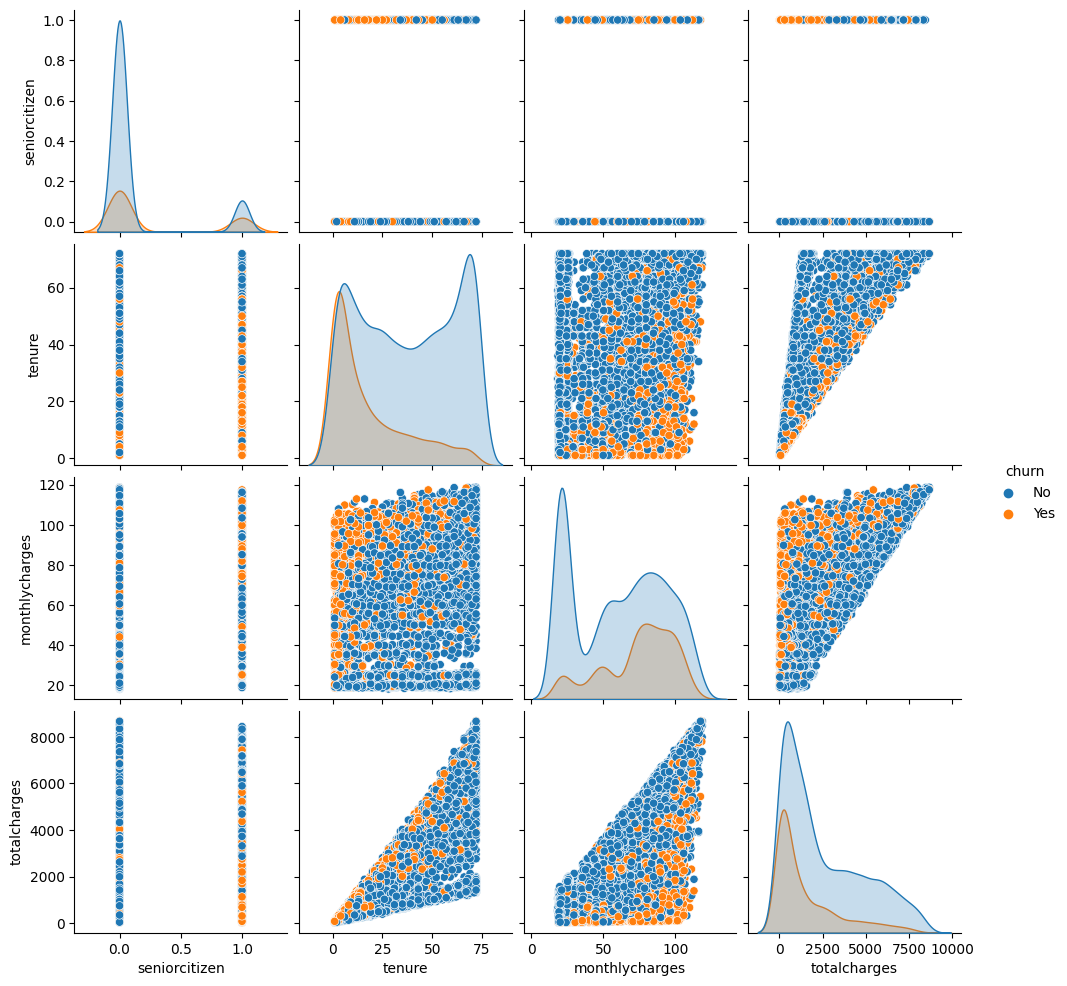

In [275]:
sns.pairplot(telco, hue = 'churn', palette = "tab10");

In [59]:
telco.describe()

,seniorcitizen,tenure,monthlycharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


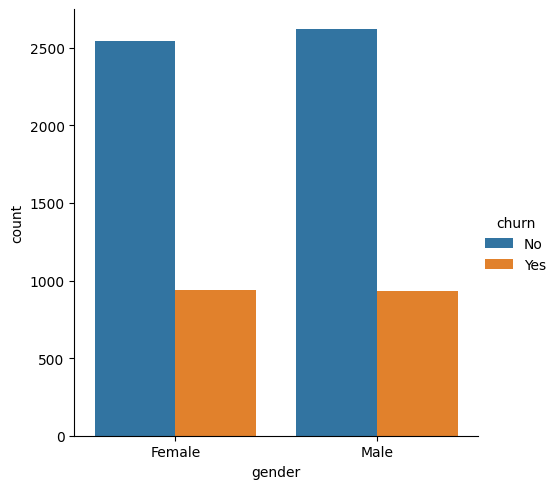

In [274]:
ax1 = sns.catplot(x="gender", kind="count", hue="churn", data=telco,
                  estimator=lambda x: sum(x==0)*100.0/len(x))

In [60]:
telco.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [61]:
telco.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [63]:
# Converting Total Charges to a numerical data type.
telco.totalcharges = pd.to_numeric(telco.totalcharges, errors='coerce')
telco.isnull().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

we have 11 missing values for totalcharges, that we need to remove them.

In [64]:
#Removing missing values 
telco.dropna(inplace = True)

In [65]:
#we create a new data frame by removing customer ID from the data set as we don't need it
telco_churn = telco.iloc[:,1:]

In [66]:
telco_churn

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [67]:
telco_churn.dtypes

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

In [68]:
telco_churn.churn=telco_churn.churn.map({'No':0,'Yes':1})

In [69]:
telco_churn.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7032, dtype: int64

In [71]:
categorical_features = [col for col in telco_churn.columns if telco_churn[col].dtype == 'O']  #perdorim nje forloop per te identifikuar emrat e te gjithe kolonave qe kane vlera kategorike

In [73]:
numerical_features = [col for col in telco_churn.columns if telco_churn[col].dtype != "O"] #ose adult[col].dtype == 'int64'  | perdorim nje forloop per te identifikuar emrat e te gjithe kolonave qe kane vlera numerike

In [74]:
print(categorical_features)
print(numerical_features)

['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']
['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges', 'churn']


### categorical_features

In [83]:
for col in categorical_features:
    print(telco_churn[col].value_counts(normalize = True))

Male      0.504693
Female    0.495307
Name: gender, dtype: float64
No     0.517491
Yes    0.482509
Name: partner, dtype: float64
No     0.701507
Yes    0.298493
Name: dependents, dtype: float64
Yes    0.903299
No     0.096701
Name: phoneservice, dtype: float64
No                  0.481371
Yes                 0.421928
No phone service    0.096701
Name: multiplelines, dtype: float64
Fiber optic    0.440273
DSL            0.343572
No             0.216155
Name: internetservice, dtype: float64
No                     0.497298
Yes                    0.286547
No internet service    0.216155
Name: onlinesecurity, dtype: float64
No                     0.438993
Yes                    0.344852
No internet service    0.216155
Name: onlinebackup, dtype: float64
No                     0.439989
Yes                    0.343857
No internet service    0.216155
Name: deviceprotection, dtype: float64
No                     0.493743
Yes                    0.290102
No internet service    0.216155
Name: techs

In [84]:
for col in categorical_features:
    print("Number of Labels for", col.capitalize(), "is", len(telco_churn[col].unique()))

Number of Labels for Gender is 2
Number of Labels for Partner is 2
Number of Labels for Dependents is 2
Number of Labels for Phoneservice is 2
Number of Labels for Multiplelines is 3
Number of Labels for Internetservice is 3
Number of Labels for Onlinesecurity is 3
Number of Labels for Onlinebackup is 3
Number of Labels for Deviceprotection is 3
Number of Labels for Techsupport is 3
Number of Labels for Streamingtv is 3
Number of Labels for Streamingmovies is 3
Number of Labels for Contract is 3
Number of Labels for Paperlessbilling is 2
Number of Labels for Paymentmethod is 4


In [85]:
telco_churn.groupby(["churn", 'gender']).count().totalcharges.reset_index()

,churn,gender,totalcharges
0,0,Female,2544
1,0,Male,2619
2,1,Female,939
3,1,Male,930


In [86]:
for col in categorical_features:
    
    print(telco_churn.groupby(['churn', col]).count().totalcharges.reset_index())
    
    

   churn  gender  totalcharges
0      0  Female          2544
1      0    Male          2619
2      1  Female           939
3      1    Male           930
   churn partner  totalcharges
0      0      No          2439
1      0     Yes          2724
2      1      No          1200
3      1     Yes           669
   churn dependents  totalcharges
0      0         No          3390
1      0        Yes          1773
2      1         No          1543
3      1        Yes           326
   churn phoneservice  totalcharges
0      0           No           510
1      0          Yes          4653
2      1           No           170
3      1          Yes          1699
   churn     multiplelines  totalcharges
0      0                No          2536
1      0  No phone service           510
2      0               Yes          2117
3      1                No           849
4      1  No phone service           170
5      1               Yes           850
   churn internetservice  totalcharges
0      0      

### numerical_features

In [87]:
telco_churn[numerical_features].isnull().sum()

seniorcitizen     0
tenure            0
monthlycharges    0
totalcharges      0
churn             0
dtype: int64

In [88]:
telco_churn[numerical_features].head()

,seniorcitizen,tenure,monthlycharges,totalcharges,churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1


In [91]:
telco_churn.seniorcitizen.value_counts()

0    5890
1    1142
Name: seniorcitizen, dtype: int64

In [92]:
telco_churn[numerical_features].describe()

,seniorcitizen,tenure,monthlycharges,totalcharges,churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [94]:
X = telco_churn.drop("churn", axis =1)
y = telco_churn["churn"]

In [97]:
X.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges'],
      dtype='object')

In [99]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7032, dtype: int64

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [101]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5625, 19)
(1407, 19)
(5625,)
(1407,)


In [102]:
print(y_train.value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

0    0.734222
1    0.265778
Name: churn, dtype: float64
0    0.734186
1    0.265814
Name: churn, dtype: float64


In [103]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [104]:
import category_encoders as ce

In [105]:
# encode remaining variables with one-hot encoding
encoder = ce.OneHotEncoder(cols=['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [106]:
X_train

,gender_1,gender_2,seniorcitizen_1,seniorcitizen_2,partner_1,partner_2,dependents_1,dependents_2,tenure_1,tenure_2,...,totalcharges_5285,totalcharges_5286,totalcharges_5287,totalcharges_5288,totalcharges_5289,totalcharges_5290,totalcharges_5291,totalcharges_5292,totalcharges_5293,totalcharges_5294
6030,1,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3410,0,1,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5483,1,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5524,0,1,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6337,1,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,0,1,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5199,1,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5235,0,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5399,1,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Perdorim RebustScaler dhe jo standardscaler apo normalizesescaler, duke qene se RobustScaler nuk ndikohet nga outliers
Formula (X-Q2)/(Q3-Q1)

In [107]:
col_names = X_train.columns

In [108]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [109]:
X_train = pd.DataFrame(X_train,columns=col_names)

In [110]:
X_train

,gender_1,gender_2,seniorcitizen_1,seniorcitizen_2,partner_1,partner_2,dependents_1,dependents_2,tenure_1,tenure_2,...,totalcharges_5285,totalcharges_5286,totalcharges_5287,totalcharges_5288,totalcharges_5289,totalcharges_5290,totalcharges_5291,totalcharges_5292,totalcharges_5293,totalcharges_5294
0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,-1.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,-1.0,0.0,0.0,-1.0,1.0,-1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5621,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5623,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
X_test = pd.DataFrame(X_test,columns=col_names)

In [112]:
X_test

,gender_1,gender_2,seniorcitizen_1,seniorcitizen_2,partner_1,partner_2,dependents_1,dependents_2,tenure_1,tenure_2,...,totalcharges_5285,totalcharges_5286,totalcharges_5287,totalcharges_5288,totalcharges_5289,totalcharges_5290,totalcharges_5291,totalcharges_5292,totalcharges_5293,totalcharges_5294
0,0.0,0.0,-1.0,1.0,-1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1404,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1405,1.0,-1.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 1.Naive Bayesian Model

In [113]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [114]:
y_pred = model.predict(X_test)

In [115]:
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [116]:
classification_metrics(y_test, y_pred)

Accuracy is:  0.4164889836531628
Precision is:  0.27805362462760674
Recall is:  0.7486631016042781
F1-Score is:  0.40550325850832725


In [117]:
y_pred_train = model.predict(X_train)

In [118]:
classification_metrics(y_train, y_pred_train)

Accuracy is:  0.9767111111111111
Precision is:  0.9194341943419434
Recall is:  1.0
F1-Score is:  0.9580262736302467


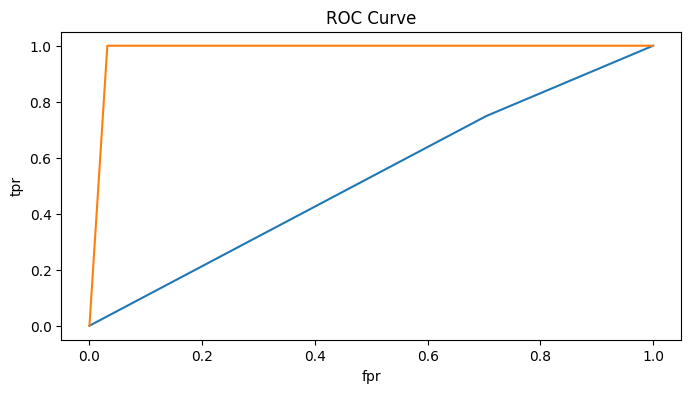

In [120]:
roc_curve_plot(y_test,y_pred,y_train, y_pred_train)

Conclusion: Overfitting

## 2.Decision Tree Model

In [168]:
model_dt = DecisionTreeClassifier(max_depth=6)

In [169]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [170]:
y_pred_dt = model_dt.predict(X_test)

In [171]:
y_pred_dt

array([0, 0, 0, ..., 0, 0, 0])

In [172]:
classification_metrics(y_test, y_pred_dt)

Accuracy is:  0.7739872068230277
Precision is:  0.5985915492957746
Recall is:  0.45454545454545453
F1-Score is:  0.5167173252279635


In [173]:
y_pred_dt_train = model_dt.predict(X_train)

In [174]:
classification_metrics(y_train, y_pred_dt_train)

Accuracy is:  0.8051555555555555
Precision is:  0.6786034019695614
Recall is:  0.5070234113712374
F1-Score is:  0.5803981623277182


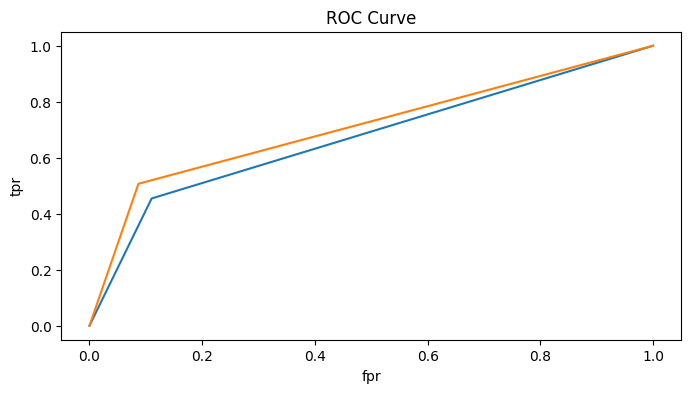

In [175]:
roc_curve_plot(y_test,y_pred_dt,y_train, y_pred_dt_train)

## 3.Bagging Random Forest

In [225]:
RFmodel = RandomForestClassifier(max_depth=25)

In [226]:
RFmodel.fit(X_train, y_train)

RandomForestClassifier(max_depth=25)

In [227]:
y_pred_RF = RFmodel.predict(X_test)

In [228]:
y_pred_RF

array([0, 0, 0, ..., 0, 0, 0])

In [229]:
classification_metrics(y_test, y_pred_RF)

Accuracy is:  0.7789623312011372
Precision is:  0.6820809248554913
Recall is:  0.3155080213903743
F1-Score is:  0.43144424131627057


In [230]:
y_pred_RF_train = RFmodel.predict(X_train)

In [231]:
classification_metrics(y_train, y_pred_RF_train)

Accuracy is:  0.8542222222222222
Precision is:  0.8737541528239202
Recall is:  0.5277591973244147
F1-Score is:  0.6580483736447039


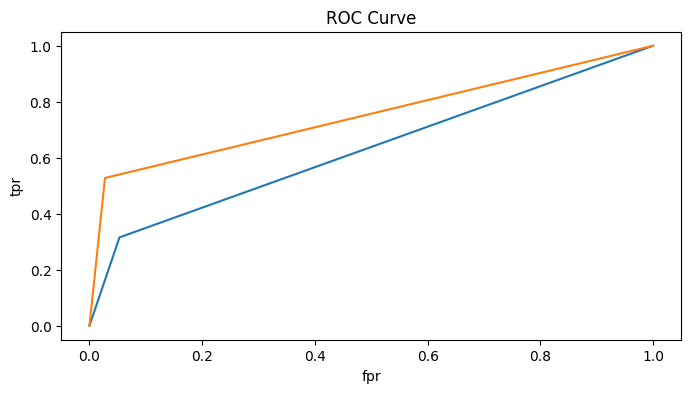

In [232]:
roc_curve_plot(y_test,y_pred_RF,y_train, y_pred_RF_train);

## 4.Ada Boost Model

In [254]:
ABmodel = AdaBoostClassifier()

In [255]:
ABmodel.fit(X_train, y_train)

AdaBoostClassifier()

In [256]:
y_pred_AB = ABmodel.predict(X_test)

In [257]:
classification_metrics(y_test, y_pred_AB)

Accuracy is:  0.7746979388770433
Precision is:  0.5861027190332326
Recall is:  0.5187165775401069
F1-Score is:  0.5503546099290779


In [258]:
y_pred_AB_train = ABmodel.predict(X_train)

In [259]:
classification_metrics(y_train, y_pred_AB_train)

Accuracy is:  0.8092444444444444
Precision is:  0.6640746500777605
Recall is:  0.57123745819398
F1-Score is:  0.6141675656238763


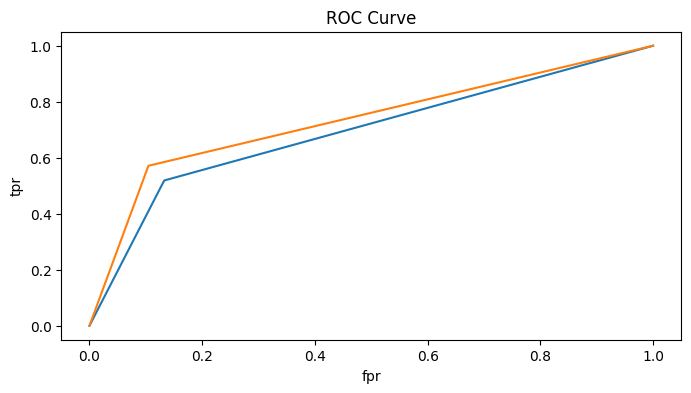

In [260]:
roc_curve_plot(y_test,y_pred_AB,y_train, y_pred_AB_train);

## 5.SVM

In [261]:
svm_model = SVC(kernel = "linear")

In [262]:
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [263]:
svm_model.support_vectors_[0][1]

-1.0

In [264]:
y_pred_svm = svm_model.predict(X_test)

In [265]:
classification_metrics(y_test, y_pred_svm)

Accuracy is:  0.7661691542288557
Precision is:  0.5663716814159292
Recall is:  0.5133689839572193
F1-Score is:  0.5385694249649369


In [266]:
y_pred_svm_train = svm_model.predict(X_train)

In [267]:
classification_metrics(y_train, y_pred_svm_train)

Accuracy is:  0.9795555555555555
Precision is:  0.9771784232365145
Recall is:  0.9451505016722408
F1-Score is:  0.9608976538592315


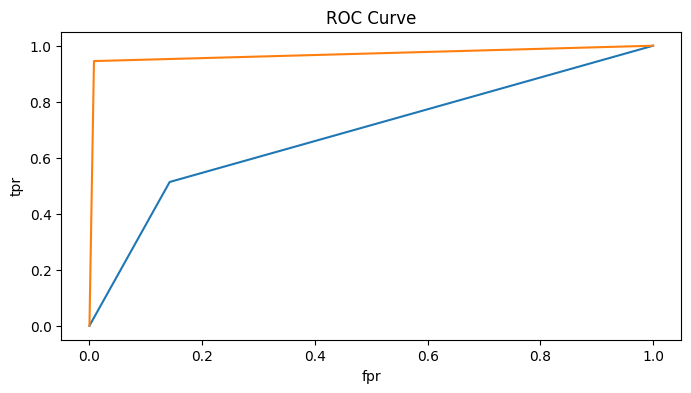

In [268]:
roc_curve_plot(y_test,y_pred_svm,y_train, y_pred_svm_train);

## 6.The method of k-nearest neighbors KNN

In [269]:
mod_knn = KNeighborsClassifier()

In [270]:
mod_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [271]:
y_knn_pred = mod_knn.predict(X_test)

In [272]:
classification_metrics(y_test, y_knn_pred)

Accuracy is:  0.7405828002842928
Precision is:  0.5116279069767442
Recall is:  0.5294117647058824
F1-Score is:  0.5203679369250986
